In [61]:
import tensorflow as tf
import os
from os.path import isfile, join
import numpy as np
import shutil
from tensorflow import keras
from pathlib import Path
from IPython.display import display, Audio
import subprocess

In [62]:
data_directory = "C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches"
audio_folder = "audio"
noise_folder = "noise"

audio_path = os.path.join(data_directory, audio_folder)
noise_path = os.path.join(data_directory, noise_folder)

In [86]:
# Code to combine all wav files stored in a folder
import os
import wave

def combine_wav_files(input_folder, output_folder, output_filename):
    # Get a list of all files in the input folder
    files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

    # Sort files based on their indices
    files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

    with wave.open(os.path.join(input_folder, files[0]), 'rb') as first_wav:
        params = first_wav.getparams()

        # Create a new WAV file for the combined audio
        output_file = os.path.join(output_folder, output_filename)
        with wave.open(output_file, 'wb') as output_wav:
            output_wav.setparams(params)

            # Concatenate frames from all files
            for file in files:
                with wave.open(os.path.join(input_folder, file), 'rb') as current_wav:
                    output_wav.writeframes(current_wav.readframes(current_wav.getnframes()))

# Example usage
input_folder = "C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\audio\\Jay_Patel"
output_folder = "C:\\Users\\bindiyamihir\\Downloads"
output_filename = "Jay_combined.wav"
combine_wav_files(input_folder, output_folder, output_filename)

# import librosa
# import soundfile as sf

# # Path to the dataset
# dataset_path = 'C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\audio'

# # Output directory to save the combined files
# output_dir = "C:\\Users\\bindiyamihir\\Downloads"

# # Create the output directory if it doesn't exist
# os.makedirs(output_dir, exist_ok=True)

# # List of speaker folders
# speaker_folders = [
#     "Mihir_Patel"
# ]

# # Number of files to combine for each speaker
# num_files_to_combine = 302

# # Iterate over each speaker's folder
# for speaker_folder in speaker_folders:
#     speaker_folder_path = os.path.join(dataset_path, speaker_folder)

#     # List the first num_files_to_combine WAV files in the speaker's folder
#     wav_files = [f"Mihir_{i}.wav" for i in range(num_files_to_combine)]

#     # Combine all WAV files into a single long file
#     combined_audio = []
#     for wav_file in wav_files:
#         wav_file_path = os.path.join(speaker_folder_path, wav_file)
#         audio, sr = librosa.load(wav_file_path, sr=None)
#         combined_audio.extend(audio)

#     # Save the combined audio file
#     output_file_path = os.path.join(output_dir, f"{speaker_folder}_combined.wav")
#     sf.write(output_file_path, combined_audio, sr)

# print("Combination complete. Combined files saved in:", output_dir)

In [224]:
# code to cut the audio from the starting position 
from pydub import AudioSegment
# 969 1938 2906 mihir
# 300 600 899 1198 Jay
# 300 601 901 1201 Jenil
# 300 600 900 1200 Pranjal
# 299 599 899 1198 Vaishnavi
def remove_start(file_path, duration_to_remove=5):
    # Read the audio file
    audio = AudioSegment.from_file(file_path)
    
    # Calculate the number of milliseconds to remove
    milliseconds_to_remove = int(duration_to_remove * 1000)
    
    # Trim the audio by removing the specified duration from the beginning
    trimmed_audio = audio[milliseconds_to_remove:]
    
    # Export the trimmed audio back to the same file
    trimmed_audio.export(file_path, format="wav")

# Example usage:
file_path = 'C:\\Users\\bindiyamihir\\Downloads\\Jenil_3.wav'
remove_start(file_path, duration_to_remove=5)

In [87]:
# code to set the sampling rate of an audio to 16000
from pydub import AudioSegment

def adjust_sampling_rate(file_path, target_sampling_rate):
    audio = AudioSegment.from_file(file_path)
    audio = audio.set_frame_rate(target_sampling_rate)
    audio.export(file_path, format="wav")
    # Print the updated sampling rate
    print(f"Sampling rate of {file_path} after adjustment: {audio.frame_rate} Hz")
    
#     converted_audio = AudioSegment.from_file(file_path)
#     print(f"Sampling rate after conversion: {converted_audio.frame_rate} Hz")

# Example usage:
file_paths = ['C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\audio\\Vaishnavi_Bhalodi\\Vaishnavi_combined.wav',
              'C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\audio\\Mihir_Patel\\Mihir_combined.wav',
              'C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\audio\\Jay_Patel\\Jay_combined.wav',
              'C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\audio\\Jenil_Shah\\Jenil_combined.wav']

target_sampling_rate = 16000  # Adjust this to your desired sampling rate

for file_path in file_paths:
    adjust_sampling_rate(file_path, target_sampling_rate)

Sampling rate of C:\Users\bindiyamihir\Desktop\Speaker Recognition\16000_pcm_speeches\audio\Vaishnavi_Bhalodi\Vaishnavi_combined.wav after adjustment: 16000 Hz
Sampling rate of C:\Users\bindiyamihir\Desktop\Speaker Recognition\16000_pcm_speeches\audio\Mihir_Patel\Mihir_combined.wav after adjustment: 16000 Hz
Sampling rate of C:\Users\bindiyamihir\Desktop\Speaker Recognition\16000_pcm_speeches\audio\Jay_Patel\Jay_combined.wav after adjustment: 16000 Hz
Sampling rate of C:\Users\bindiyamihir\Desktop\Speaker Recognition\16000_pcm_speeches\audio\Jenil_Shah\Jenil_combined.wav after adjustment: 16000 Hz


In [188]:
# code to split the audio wav file into duration of (1-1) seconds and store it below the existing file of the same speaker
import wave
import array

def get_last_index(output_folder):
    # Get a list of all files in the output folder
    files = [f for f in os.listdir(output_folder) if os.path.isfile(os.path.join(output_folder, f))]

    # Extract indices from file names and find the maximum
    indices = [int(f.split('_')[-1].split('.')[0]) for f in files if f.startswith('Vaishnavi_')]
    return max(indices) + 1 if indices else 1

def split_wav(input_file, output_prefix, segment_duration=1):
    output_folder = os.path.dirname(output_prefix)
    start_index = get_last_index(output_folder)
    
    with wave.open(input_file, 'rb') as wav_file:
        params = wav_file.getparams()
        sample_width = params.sampwidth
        frame_rate = params.framerate
        num_channels = params.nchannels

        # Calculate the number of frames for a 1-second segment
        segment_frames = int(segment_duration * frame_rate)

        # Read the entire audio data
        audio_data = wav_file.readframes(params.nframes)

        # Split the audio into 1-second segments
        for i in range(0, len(audio_data), segment_frames * sample_width * num_channels):
            segment = audio_data[i:i + segment_frames * sample_width * num_channels]

#             # Create a new WAV file for each segment
#             output_file = f"{output_prefix}_{i // (segment_frames * sample_width * num_channels)}.wav"
            
            # Create a new WAV file for each segment with an incremented index in the filename
            output_file = f"{output_prefix}_{start_index}.wav"
            start_index += 1
            
            with wave.open(output_file, 'wb') as output_wav:
                output_wav.setparams(params)
                output_wav.writeframes(segment)

# Example usage
input_wav = "C:\\Users\\bindiyamihir\\Downloads\\vaish-1.wav"
output_prefix = "C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\audio\\Vaishnavi_Bhalodi\\Vaishnavi"
split_wav(input_wav, output_prefix)

In [442]:
# code to split the audio wav file into duration of (2-2) seconds and store it below the existing file of the same speaker
# after 1200 for mihir
# after 1198 for jay
# after 1201 for jenil
# after 1200 for pranjal
# after 1198 for vaishnavi
import wave
import array

def get_last_index(output_folder):
    # Get a list of all files in the output folder
    files = [f for f in os.listdir(output_folder) if os.path.isfile(os.path.join(output_folder, f))]

    # Extract indices from file names and find the maximum
    indices = [int(f.split('_')[-1].split('.')[0]) for f in files if f.startswith('Vaishnavi_')]
    return max(indices) + 1 if indices else 1

def split_wav(input_file, output_prefix, segment_duration=2):
    output_folder = os.path.dirname(output_prefix)
    start_index = get_last_index(output_folder)
    
    with wave.open(input_file, 'rb') as wav_file:
        params = wav_file.getparams()
        sample_width = params.sampwidth
        frame_rate = params.framerate
        num_channels = params.nchannels

        # Calculate the number of frames for a 2-second segment
        segment_frames = int(segment_duration * frame_rate)

        # Read the entire audio data
        audio_data = wav_file.readframes(params.nframes)

        # Split the audio into 2-second segments
        for i in range(0, len(audio_data), segment_frames * sample_width * num_channels):
            segment = audio_data[i:i + segment_frames * sample_width * num_channels]

#             # Create a new WAV file for each segment
#             output_file = f"{output_prefix}_{i // (segment_frames * sample_width * num_channels)}.wav"
            
            # Create a new WAV file for each segment with an incremented index in the filename
            output_file = f"{output_prefix}_{start_index}.wav"
            start_index += 1
            
            with wave.open(output_file, 'wb') as output_wav:
                output_wav.setparams(params)
                output_wav.writeframes(segment)

# Example usage
input_wav = "C:\\Users\\bindiyamihir\\Downloads\\Vaishnavi_combined.wav"
output_prefix = "C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\audio\\Vaishnavi_Bhalodi\\Vaishnavi"
split_wav(input_wav, output_prefix)

In [447]:
# code to split the audio wav file into duration of (3-3) seconds and store it below the existing file of the same speaker
# after 1351 for mihir
# after 1348 for jay
# after 1351 for jenil
# after 1350 for pranjal
# after 1348 for vaishnavi
import wave
import array

def get_last_index(output_folder):
    # Get a list of all files in the output folder
    files = [f for f in os.listdir(output_folder) if os.path.isfile(os.path.join(output_folder, f))]

    # Extract indices from file names and find the maximum
    indices = [int(f.split('_')[-1].split('.')[0]) for f in files if f.startswith('Vaishnavi_')]
    return max(indices) + 1 if indices else 1

def split_wav(input_file, output_prefix, segment_duration=3):
    output_folder = os.path.dirname(output_prefix)
    start_index = get_last_index(output_folder)
    
    with wave.open(input_file, 'rb') as wav_file:
        params = wav_file.getparams()
        sample_width = params.sampwidth
        frame_rate = params.framerate
        num_channels = params.nchannels

        # Calculate the number of frames for a 3-second segment
        segment_frames = int(segment_duration * frame_rate)

        # Read the entire audio data
        audio_data = wav_file.readframes(params.nframes)

        # Split the audio into 3-second segments
        for i in range(0, len(audio_data), segment_frames * sample_width * num_channels):
            segment = audio_data[i:i + segment_frames * sample_width * num_channels]

#             # Create a new WAV file for each segment
#             output_file = f"{output_prefix}_{i // (segment_frames * sample_width * num_channels)}.wav"
            
            # Create a new WAV file for each segment with an incremented index in the filename
            output_file = f"{output_prefix}_{start_index}.wav"
            start_index += 1
            
            with wave.open(output_file, 'wb') as output_wav:
                output_wav.setparams(params)
                output_wav.writeframes(segment)

# Example usage
input_wav = "C:\\Users\\bindiyamihir\\Downloads\\Vaishnavi_combined.wav"
output_prefix = "C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\audio\\Vaishnavi_Bhalodi\\Vaishnavi"
split_wav(input_wav, output_prefix)

In [63]:
audio_path

'C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\audio'

In [64]:
noise_path

'C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\noise'

In [65]:
voicefile_names=os.listdir("C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\audio")

In [66]:
voicefile_names

['Jay_Patel', 'Jenil_Shah', 'Mihir_Patel', 'Vaishnavi_Bhalodi']

In [67]:
noisefile_names=os.listdir("C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\noise")

In [68]:
noisefile_names

['other', '_background_noise_']

In [69]:
voice_files_count=[]

In [70]:
for t in voicefile_names:
    p=os.listdir("C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\audio"+"/"+t)
    len_class=len(p)
    voice_files_count.append(len_class)

In [71]:
voice_files_count

[1800, 1803, 1801, 1801]

In [72]:
noise_files_count=[]

In [73]:
for t in noisefile_names:
    p=os.listdir("C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\noise"+"/"+t)
    len_class=len(p)
    noise_files_count.append(len_class)

In [74]:
noise_files_count

[2, 4]

In [75]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [76]:
import plotly.express as px
import numpy

random_x = voicefile_names
random_y = voice_files_count

fig = px.bar(random_x, y = random_y)
fig.show()

In [77]:
import plotly.express as px
import numpy

random_x = noisefile_names
random_y = noise_files_count

fig = px.bar(random_x, y = random_y)
fig.show()

In [78]:
valid_split = 0.1

shuffle_seed = 43

sample_rate = 16000

scale = 0.5

batch_size = 128

epochs = 15

In [79]:
noise_paths = []
for subdir in os.listdir(noise_path):
    subdir_path = Path(noise_path) / subdir
    if os.path.isdir(subdir_path):
        noise_paths += [
            os.path.join(subdir_path, filepath)
            for filepath in os.listdir(subdir_path)
            if filepath.endswith(".wav")
        ]

In [80]:
noise_paths

['C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\noise\\other\\exercise_bike.wav',
 'C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\noise\\other\\pink_noise.wav',
 'C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\noise\\_background_noise_\\10convert.com_Audience-Claps_daSG5fwdA7o.wav',
 'C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\noise\\_background_noise_\\doing_the_dishes.wav',
 'C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\noise\\_background_noise_\\dude_miaowing.wav',
 'C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\noise\\_background_noise_\\running_tap.wav']

In [81]:
import librosa
x, sr = librosa.load('C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\noise\\other\\exercise_bike.wav')

In [82]:
print(x.shape)
print(sr)

(1350648,)
22050


In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

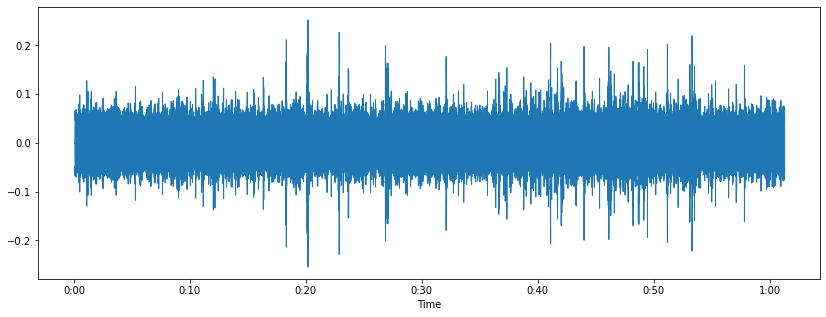

In [84]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

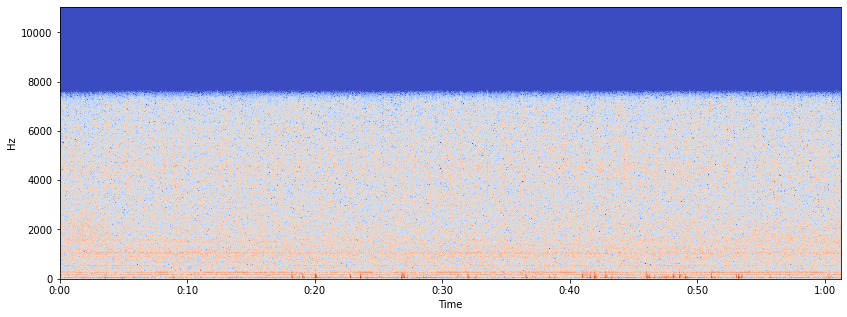

In [85]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [86]:
import IPython.display as ipd
ipd.Audio('C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\noise\\other\\exercise_bike.wav')

In [87]:
pip install pydub

Note: you may need to restart the kernel to use updated packages.


In [88]:
def load_noise_sample(path):
    sample, sampling_rate = tf.audio.decode_wav(
        tf.io.read_file(path), desired_channels=1
    )
    print("sampling rate of orignal audio", sampling_rate)
    if sampling_rate == sample_rate:
        print("shape",sample.shape[0])
        slices = int(sample.shape[0] / sample_rate)
        print(slices)
        sample = tf.split(sample[: slices * sample_rate], slices)
        return sample
    else:
        print("sampling rate for", path, "is incorrect")
        return None
    
noises = []
for path in noise_paths:
    sample = load_noise_sample(path)
    if sample:
        noises.extend(sample)
noises = tf.stack(noises)        

sampling rate of orignal audio tf.Tensor(16000, shape=(), dtype=int32)
shape 980062
61
sampling rate of orignal audio tf.Tensor(16000, shape=(), dtype=int32)
shape 960000
60
sampling rate of orignal audio tf.Tensor(16000, shape=(), dtype=int32)
shape 260685
16
sampling rate of orignal audio tf.Tensor(16000, shape=(), dtype=int32)
shape 1522930
95
sampling rate of orignal audio tf.Tensor(16000, shape=(), dtype=int32)
shape 988891
61
sampling rate of orignal audio tf.Tensor(16000, shape=(), dtype=int32)
shape 978488
61


In [89]:
from pydub import AudioSegment

def adjust_sampling_rate(file_path, target_sampling_rate):
    audio = AudioSegment.from_file(file_path)
    audio = audio.set_frame_rate(target_sampling_rate)
    audio.export(file_path, format="wav")

# Example usage:
file_paths = ['C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\noise\\other\\exercise_bike.wav',
 'C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\noise\\other\\pink_noise.wav',
 'C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\noise\\_background_noise_\\10convert.com_Audience-Claps_daSG5fwdA7o.wav',
 'C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\noise\\_background_noise_\\doing_the_dishes.wav',
 'C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\noise\\_background_noise_\\dude_miaowing.wav',
 'C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\16000_pcm_speeches\\noise\\_background_noise_\\running_tap.wav']

target_sampling_rate = 16000  # Adjust this to your desired sampling rate

for file_path in file_paths:
    adjust_sampling_rate(file_path, target_sampling_rate)

In [90]:
noises

<tf.Tensor: shape=(354, 16000, 1), dtype=float32, numpy=
array([[[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        ...,
        [-0.00546265],
        [ 0.0078125 ],
        [ 0.03189087]],

       [[ 0.02236938],
        [ 0.02398682],
        [ 0.03482056],
        ...,
        [ 0.0453186 ],
        [ 0.01754761],
        [-0.00064087]],

       [[ 0.02719116],
        [ 0.00177002],
        [-0.02172852],
        ...,
        [ 0.02389526],
        [ 0.00952148],
        [ 0.01779175]],

       ...,

       [[-0.17727661],
        [-0.02957153],
        [ 0.0062561 ],
        ...,
        [-0.02902222],
        [-0.07507324],
        [-0.05303955]],

       [[ 0.04153442],
        [ 0.01397705],
        [-0.05789185],
        ...,
        [-0.11480713],
        [-0.05969238],
        [ 0.0597229 ]],

       [[-0.06341553],
        [ 0.01876831],
        [-0.00259399],
        ...,
        [ 0.00292969],
        [-0.06362915],
        [ 0.08926392]]], dtype=float3

In [91]:
def paths_and_labels_to_dataset(audio_paths, labels):
    path_ds = tf.data.Dataset.from_tensor_slices(audio_paths)
    audio_ds = path_ds.map(lambda x: path_to_audio(x))
    label_ds = tf.data.Dataset.from_tensor_slices(labels)
    return tf.data.Dataset.zip((audio_ds, label_ds))

In [92]:
def path_to_audio(path):
    audio = tf.io.read_file(path)
    audio, _ = tf.audio.decode_wav(audio, 1, sample_rate)
    return audio

In [93]:
def add_noise(audio, noises=None, scale=0.5):
#     if noises is not None:
#         tf_rnd = tf.random.uniform(
#             (tf.shape(audio)[0],), 0, noises.shape[0], dtype=tf.int32
#         )
#         noise = tf.gather(noises, tf_rnd, axis=0)

#         prop = tf.math.reduce_max(audio, axis=1) / tf.math.reduce_max(noise, axis=1)
#         prop = tf.repeat(tf.expand_dims(prop, axis=1), tf.shape(audio)[1], axis=1)

#         audio = audio + noise * prop * scale

    return audio

In [94]:
def audio_to_fft(audio):
    audio = tf.squeeze(audio, axis=-1)
    fft = tf.signal.fft(
        tf.cast(tf.complex(real=audio, imag=tf.zeros_like(audio)), tf.complex64)
    )
    fft = tf.expand_dims(fft, axis=-1)

    return tf.math.abs(fft[:, : (audio.shape[1] // 2), :])

In [95]:
class_names = os.listdir(audio_path)
print(class_names,)

audio_paths = []
labels = []
for label, name in enumerate(class_names):
    print("Speaker:",(name))
    dir_path = Path(audio_path) / name
    speaker_sample_paths = [
        os.path.join(dir_path, filepath)
        for filepath in os.listdir(dir_path)
        if filepath.endswith(".wav")
    ]
    audio_paths += speaker_sample_paths
    labels += [label] * len(speaker_sample_paths)

['Jay_Patel', 'Jenil_Shah', 'Mihir_Patel', 'Vaishnavi_Bhalodi']
Speaker: Jay_Patel
Speaker: Jenil_Shah
Speaker: Mihir_Patel
Speaker: Vaishnavi_Bhalodi


In [96]:
# Shuffle to generate random data
rng = np.random.RandomState(shuffle_seed)
rng.shuffle(audio_paths)
rng = np.random.RandomState(shuffle_seed)
rng.shuffle(labels)

In [97]:
# Split into training and validation
num_val_samples = int(valid_split * len(audio_paths))
train_audio_paths = audio_paths[:-num_val_samples]
train_labels = labels[:-num_val_samples]


valid_audio_paths = audio_paths[-num_val_samples:]
valid_labels = labels[-num_val_samples:]

In [98]:
# Create datasets, one for training and the other for validation
train_ds = paths_and_labels_to_dataset(train_audio_paths, train_labels)
train_ds = train_ds.shuffle(buffer_size=batch_size * 8, seed=shuffle_seed).batch(
    batch_size
)

valid_ds = paths_and_labels_to_dataset(valid_audio_paths, valid_labels)
valid_ds = valid_ds.shuffle(buffer_size=32 * 8, seed=shuffle_seed).batch(32)

In [99]:
# Add noise to the training set
train_ds = train_ds.map(
    lambda x, y: (add_noise(x, noises, scale=scale), y),
    num_parallel_calls=tf.data.experimental.AUTOTUNE,
)

# Transform audio wave to the frequency domain using `audio_to_fft`
train_ds = train_ds.map(
    lambda x, y: (audio_to_fft(x), y), num_parallel_calls=tf.data.experimental.AUTOTUNE
)

train_ds = train_ds.prefetch(tf.data.experimental.AUTOTUNE)

valid_ds = valid_ds.map(
    lambda x, y: (audio_to_fft(x), y), num_parallel_calls=tf.data.experimental.AUTOTUNE
)
valid_ds = valid_ds.prefetch(tf.data.experimental.AUTOTUNE)

In [100]:
from tensorflow.keras.layers import Conv1D

In [101]:
def residual_block(x, filters, conv_num = 3, activation = "relu"):
    s = keras.layers.Conv1D(filters, 1, padding = "same")(x)
    
    for i in range(conv_num - 1):
        x = keras.layers.Conv1D(filters, 3, padding = "same")(x)
        x = keras.layers.Activation(activation)(x)
    
    x = keras.layers.Conv1D(filters, 3, padding = "same")(x)
    x = keras.layers.Add()([x, s])
    x = keras.layers.Activation(activation)(x)
    
    return keras.layers.MaxPool1D(pool_size = 2, strides = 2)(x)
def build_model(input_shape, num_classes):
    inputs = keras.layers.Input(shape = input_shape, name = "input")
    
    x = residual_block(inputs, 16, 2)
    x = residual_block(inputs, 32, 2)
    x = residual_block(inputs, 64, 3)
    x = residual_block(inputs, 128, 3)
    x = residual_block(inputs, 128, 3)
    x = keras.layers.AveragePooling1D(pool_size=3, strides=3)(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(256, activation="relu")(x)
    x = keras.layers.Dense(128, activation="relu")(x)
    
    outputs = keras.layers.Dense(num_classes, activation = "softmax", name = "output")(x)
    
    return keras.models.Model(inputs = inputs, outputs = outputs)

In [102]:
model = build_model((sample_rate // 2, 1), len(class_names))


In [54]:
model.summary()

model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) 

model_save_filename = "model_4.h5"

earlystopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

mdlcheckpoint_cb = keras.callbacks.ModelCheckpoint(model_save_filename, monitor="val_accuracy", save_best_only=True)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 8000, 1)]    0                                            
__________________________________________________________________________________________________
conv1d_15 (Conv1D)              (None, 8000, 128)    512         input[0][0]                      
__________________________________________________________________________________________________
activation_10 (Activation)      (None, 8000, 128)    0           conv1d_15[0][0]                  
__________________________________________________________________________________________________
conv1d_16 (Conv1D)              (None, 8000, 128)    49280       activation_10[0][0]              
______________________________________________________________________________________________

In [55]:
epochs=20

In [56]:
# model_save_filename = "model.h5"

# # Check if the model file exists, and load the model if it does
# if os.path.exists(model_save_filename):
#     model = keras.models.load_model(model_save_filename)
    
    #Train model
history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=valid_ds,
    callbacks=[earlystopping_cb, mdlcheckpoint_cb],
)
    
# # Save the final model after training
# model.save('model_final.h5')

Epoch 1/20
51/51 [==============================] - 358s 7s/step - loss: 3.9324 - accuracy: 0.8248 - val_loss: 0.0977 - val_accuracy: 0.9903


C:\Users\bindiyamihir\AppData\Local\Programs\Python\Python36\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.



Epoch 2/20
51/51 [==============================] - 350s 7s/step - loss: 0.0284 - accuracy: 0.9915 - val_loss: 0.0856 - val_accuracy: 0.9903
Epoch 3/20
51/51 [==============================] - 359s 7s/step - loss: 0.0215 - accuracy: 0.9932 - val_loss: 0.0447 - val_accuracy: 0.9931
Epoch 4/20
51/51 [==============================] - 360s 7s/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.0591 - val_accuracy: 0.9958
Epoch 5/20
51/51 [==============================] - 360s 7s/step - loss: 0.0218 - accuracy: 0.9924 - val_loss: 0.0475 - val_accuracy: 0.9889
Epoch 6/20
51/51 [==============================] - 361s 7s/step - loss: 0.0155 - accuracy: 0.9955 - val_loss: 0.1665 - val_accuracy: 0.9736
Epoch 7/20
51/51 [==============================] - 361s 7s/step - loss: 0.0149 - accuracy: 0.9952 - val_loss: 0.0645 - val_accuracy: 0.9944
Epoch 8/20
51/51 [==============================] - 359s 7s/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.0866 - val_accuracy: 0.9944
Epoch 9/20
51

In [57]:
# Save the final model after training
model.save('model_final_4.h5')

In [103]:
from keras.models import load_model

model=load_model('C:\\Users\\bindiyamihir\\Desktop\\Speaker Recognition\\model_final_4.h5')

In [104]:
print("Accuracy of model:",model.evaluate(valid_ds))

23/23 [==============================] - 14s 572ms/step - loss: 0.0447 - accuracy: 0.9931
Accuracy of model: [0.04469325393438339, 0.9930555820465088]


In [105]:
SAMPLES_TO_DISPLAY = 10

test_ds = paths_and_labels_to_dataset(valid_audio_paths, valid_labels)
test_ds = test_ds.shuffle(buffer_size=batch_size * 8, seed=shuffle_seed).batch(
    batch_size
)

test_ds = test_ds.map(lambda x, y: (add_noise(x, noises, scale=scale), y))
# test_ds = test_ds.map(lambda x, y: (x, y))


for audios, labels in test_ds.take(1):
    ffts = audio_to_fft(audios)
    y_pred = model.predict(ffts)
#     rnd = np.random.randint(0, batch_size, SAMPLES_TO_DISPLAY)
    total_samples = len(audios)
    rnd = np.random.randint(0, total_samples, SAMPLES_TO_DISPLAY)
    audios = audios.numpy()[rnd, :, :]
    labels = labels.numpy()[rnd]
    y_pred = np.argmax(y_pred, axis=-1)[rnd]
    
    for index in range(SAMPLES_TO_DISPLAY):
        print(
            "Speaker:\33{} {}\33[0m\tPredicted:\33{} {}\33[0m".format(
                "[92m" if labels[index] == y_pred[index] else "[91m",
                class_names[labels[index]],
                "[92m" if labels[index] == y_pred[index] else "[91m",
                class_names[y_pred[index]],
            )
        )
        if labels[index] ==y_pred[index]:
            print("Welcome")
        else:
            print("Sorry")
        print("The speaker is" if labels[index] == y_pred[index] else "", class_names[y_pred[index]])
    

Speaker: Jenil_Shah	Predicted: Jenil_Shah
Welcome
The speaker is Jenil_Shah
Speaker: Jenil_Shah	Predicted: Jenil_Shah
Welcome
The speaker is Jenil_Shah
Speaker: Vaishnavi_Bhalodi	Predicted: Vaishnavi_Bhalodi
Welcome
The speaker is Vaishnavi_Bhalodi
Speaker: Jay_Patel	Predicted: Jay_Patel
Welcome
The speaker is Jay_Patel
Speaker: Jay_Patel	Predicted: Jay_Patel
Welcome
The speaker is Jay_Patel
Speaker: Mihir_Patel	Predicted: Mihir_Patel
Welcome
The speaker is Mihir_Patel
Speaker: Jay_Patel	Predicted: Jay_Patel
Welcome
The speaker is Jay_Patel
Speaker: Mihir_Patel	Predicted: Mihir_Patel
Welcome
The speaker is Mihir_Patel
Speaker: Jay_Patel	Predicted: Jay_Patel
Welcome
The speaker is Jay_Patel
Speaker: Jay_Patel	Predicted: Jay_Patel
Welcome
The speaker is Jay_Patel


In [106]:
 def paths_to_dataset(audio_paths):
    path_ds = tf.data.Dataset.from_tensor_slices(audio_paths)
    return tf.data.Dataset.zip((path_ds))

def predict(path, labels):
    test = paths_and_labels_to_dataset(path, labels)


    test = test.shuffle(buffer_size=batch_size * 8, seed=shuffle_seed).batch(
    batch_size
    )
    test = test.prefetch(tf.data.experimental.AUTOTUNE)


    test = test.map(lambda x, y: (add_noise(x, noises, scale=scale), y))
    
    
    for audios, labels in test.take(1):
        ffts = audio_to_fft(audios)
        y_pred = model.predict(ffts)
        rnd = np.random.randint(0, 1, 1)
        audios = audios.numpy()[rnd, :]
        labels = labels.numpy()[rnd]
        y_pred = np.argmax(y_pred, axis=-1)[rnd]

    for index in range(1):
            print(
            "Speaker:\33{} {}\33[0m\tPredicted:\33{} {}\33[0m".format(
            "[92m",y_pred[index],
                "[92m", y_pred[index]
                )
            )
            
            print("Speaker Predicted:",class_names[y_pred[index]])

In [113]:
pip install ffmpeg-python

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492037 sha256=1d8e715dec1c304db012191a4d5379ff230029d2a7e787d761401c75084b0511
  Stored in directory: c:\users\bindiyamihir\appdata\local\pip\cache\wheels\63\f1\0c\e56d12b3804345ce5ba34279cbfe583ecafdd1401551457330
Successfully built future
Note: you may need to restart the kernel to use updated packages.


In [16]:
from pydub import AudioSegment

# Specify the path to the FFmpeg executable
ffmpeg_path = r'C:\Users\bindiyamihir\Downloads\ffmpeg.exe'  # Adjust the path accordingly
AudioSegment.converter = ffmpeg_path

def convert_to_wav(input_file, output_file):
    # Load the audio file using pydub
    audio = AudioSegment.from_file(input_file)

    # Convert to WAV format
    audio.export(output_file, format="wav")

# Example usage:
input_file_path = r"C:\Users\bindiyamihir\Downloads\Pranjal_1.mp3"
output_file_path = r"C:\Users\bindiyamihir\Downloads\Pranjal_1.wav"

convert_to_wav(input_file_path, output_file_path)

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [ ]:
from pydub import AudioSegment

def adjust_sampling_rate(file_path, target_sampling_rate):
    audio = AudioSegment.from_file(file_path)
    audio = audio.set_frame_rate(target_sampling_rate)
    audio.export(file_path, format="wav")
    
    converted_audio = AudioSegment.from_file(file_path)
    print(f"Sampling rate after conversion: {converted_audio.frame_rate} Hz")

# Example usage:
file_paths = ['C:\\Users\\bindiyamihir\\Downloads\\Jay_4.wav']

target_sampling_rate = 16000  # Adjust this to your desired sampling rate

for file_path in file_paths:
    adjust_sampling_rate(file_path, target_sampling_rate)

In [ ]:
import IPython.display as ipd
ipd.Audio('C:\\Users\\bindiyamihir\\Downloads\\Jay_4.wav')

In [ ]:
path = ["C:\\Users\\bindiyamihir\\Downloads\\Jay_4.wav"]
labels = ["unknown"]
try:
    predict(path, labels)
except:
    print("Error! Check if the file correctly passed or not!")